In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tqdm import tqdm
tqdm.pandas()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks

# Test

In [74]:
T_df = pd.read_csv('robot.csv')[6000:8000].reset_index(drop=True)
Q_df = pd.read_csv('pattern.csv')

<AxesSubplot:ylabel='Acceleration'>

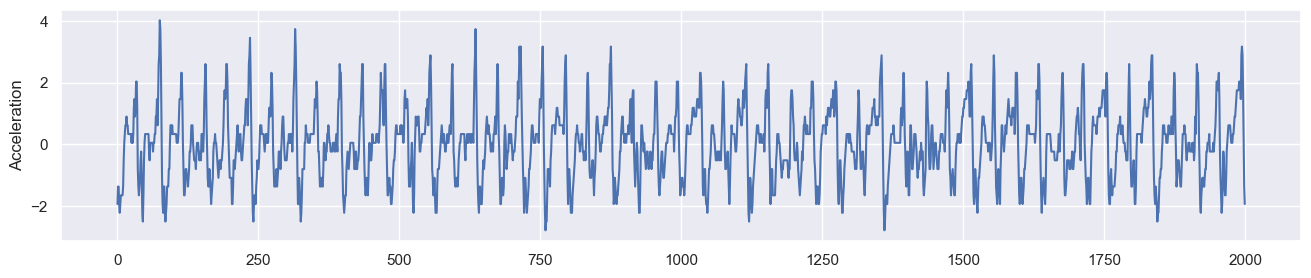

In [75]:
fig,ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=T_df,x=T_df.index,y='Acceleration')

<AxesSubplot:ylabel='Acceleration'>

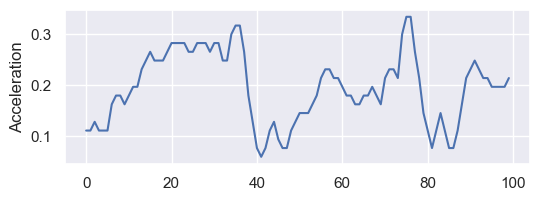

In [76]:
fig,ax = plt.subplots(figsize=(6,2))
sns.lineplot(data=Q_df,x=Q_df.index,y='Acceleration')

In [80]:
def autocor_distance(T_df,Q_df,features):
    
    T_df_values = T_df[features].values
    y = Q_df[features].values
    
    l_scores = []

    for idx in tqdm(range(T_df.shape[0]-Q_df.shape[0])):

        X = T_df_values[idx:idx+Q_df.shape[0]]
        
        reg = LinearRegression().fit(X, y)
        l_scores.append(reg.score(X, y))
    
    return np.array(l_scores)

In [81]:
dist = autocor_distance(T_df,Q_df,features=['Acceleration'])

100%|█████████████████████████████████████████████████████████████████████████████| 1900/1900 [00:02<00:00, 777.09it/s]


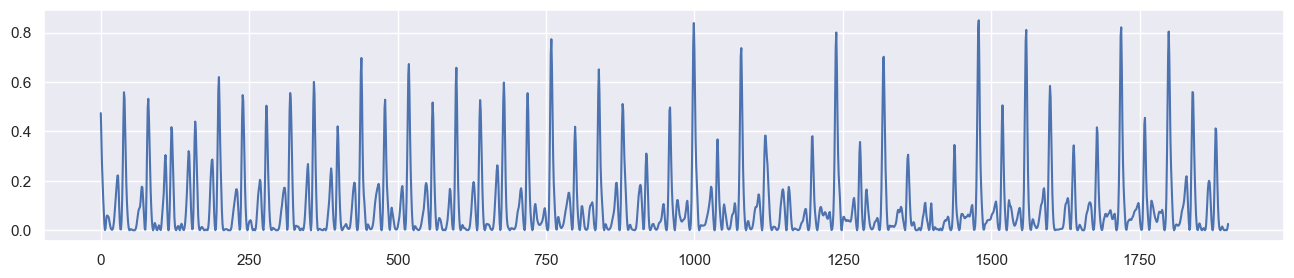

In [82]:
fig,ax = plt.subplots(figsize=(16,3))
plt.plot(dist)

In [83]:
peaks, properties = find_peaks(dist, distance=150,prominence=0.7)

_, peaks_ord = zip(*sorted(zip(properties['prominences'], peaks)))
peaks_ord = peaks_ord[::-1]
peaks_ord

(1479, 999, 1719, 1239, 759)

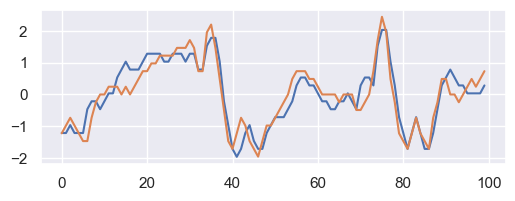

In [84]:
idx = 1479
Q_z_norm = StandardScaler().fit_transform(Q_df.values)
nn_z_norm = StandardScaler().fit_transform(T_df.values[idx:idx+len(Q_df)])

fig,ax = plt.subplots(figsize=(6,2))
plt.plot(Q_z_norm)
plt.plot(nn_z_norm)

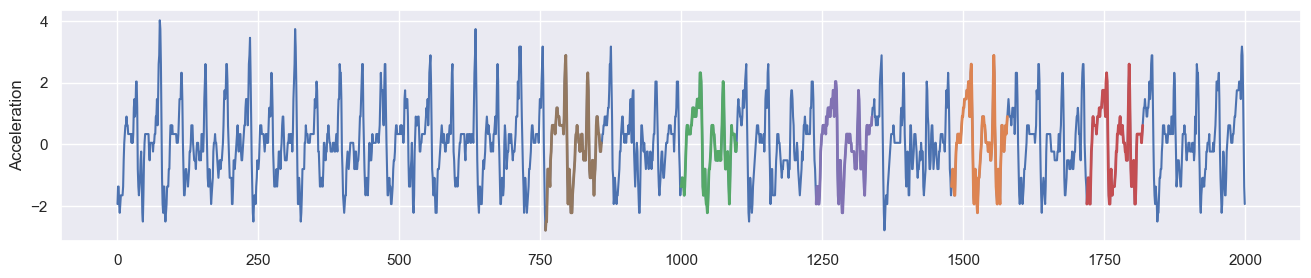

In [85]:
fig,ax = plt.subplots(figsize=(16,3))
sns.lineplot(data=T_df,x=T_df.index,y='Acceleration')
for p_idx in peaks_ord:
    plt.plot(range(p_idx, p_idx+len(Q_df)), T_df.values[p_idx:p_idx+len(Q_df)], lw=2)

# PDM telemerty - multivariate

https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance

In [86]:
df = pd.read_csv('PdM_telem_failures.csv.gz')
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,target
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0.0


In [87]:
features = ['rotate', 'pressure']

In [88]:
# extract pattern on machine 10
pattern = df[df.machineID == 10].reset_index(drop=True)[6000:6300]

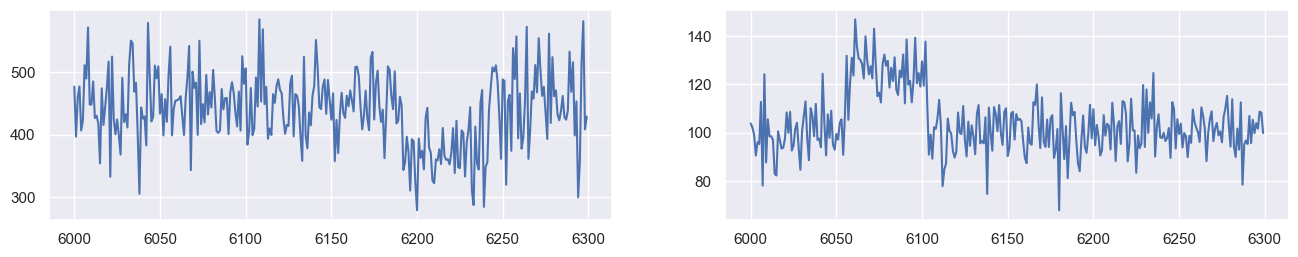

In [89]:
l,c,i = 2,2,1
fig,ax=plt.subplots(figsize=(16,6))
for col in features:
    plt.subplot(l,c,i)
    plt.plot(pattern[col])
    i+=1

In [90]:
df_test = df[df.machineID == 1]

In [91]:
dist = autocor_distance(df_test,pattern,features=['rotate', 'pressure'])

100%|█████████████████████████████████████████████████████████████████████████████| 8461/8461 [00:11<00:00, 749.59it/s]


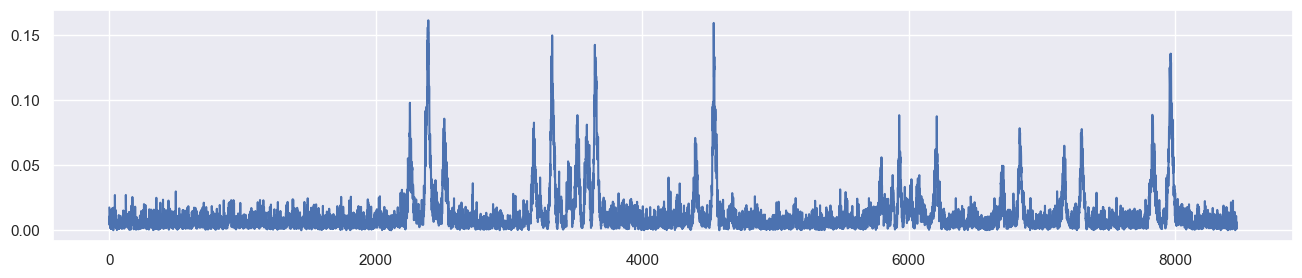

In [92]:
fig,ax=plt.subplots(figsize=(16,3))
plt.plot(dist)

In [93]:
peaks, properties = find_peaks(dist, distance=150,prominence=0.12)

_, peaks_ord = zip(*sorted(zip(properties['prominences'], peaks)))
peaks_ord = peaks_ord[::-1]
peaks_ord

(2394, 4536, 3324, 3644, 7966)

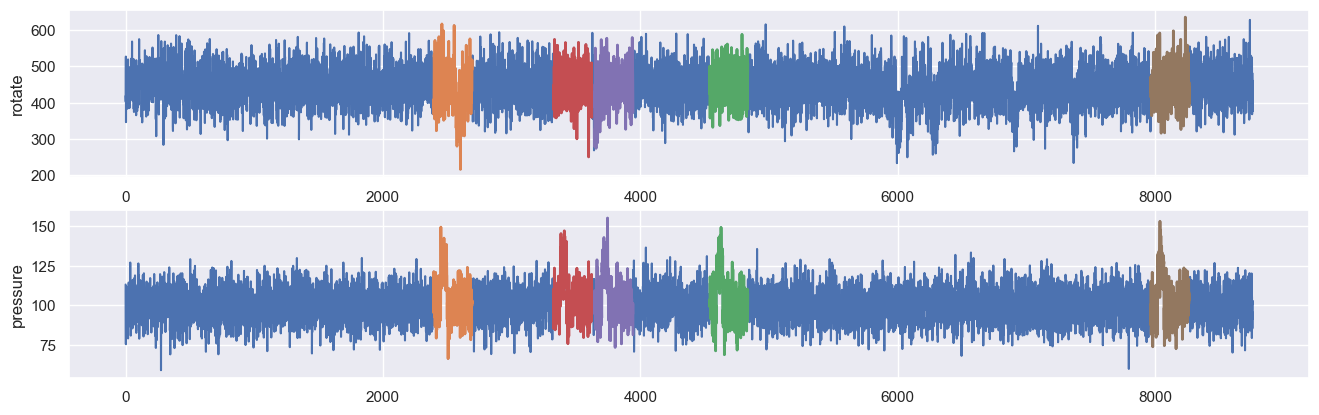

In [94]:
l,c,i = 4,1,1

fig,ax = plt.subplots(figsize=(16,10))

for col in features:
    plt.subplot(l,c,i)
    sns.lineplot(data=df_test,x=df_test.index,y=col)
    for p_idx in peaks_ord:
        plt.plot(range(p_idx, p_idx+pattern.shape[0]), df_test[col].values[p_idx:p_idx+pattern.shape[0]], lw=2)
    i+=1

In [95]:
idx = 2394
df_test.iloc[idx]

datetime     2015-04-11 00:00:00
machineID                      1
volt                  173.730323
rotate                   390.181
pressure                95.55029
vibration              43.428757
target                       0.0
Name: 2394, dtype: object

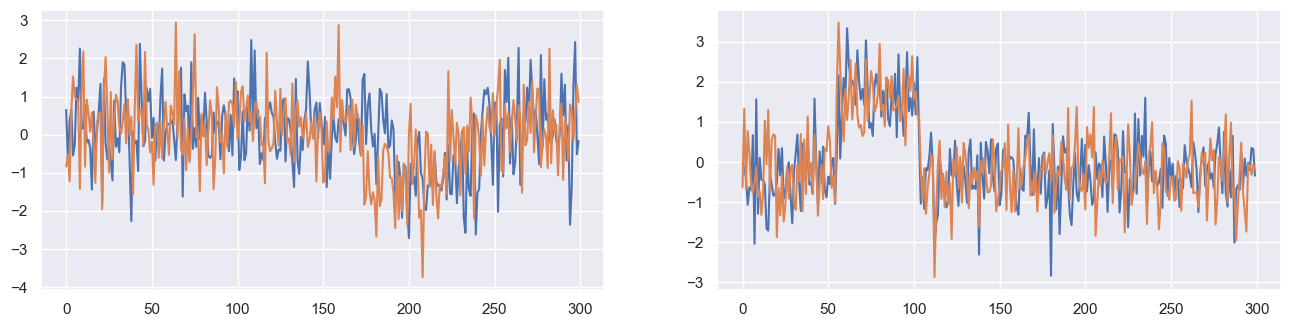

In [96]:
l,c,i = 2,2,1
fig,ax=plt.subplots(figsize=(16,8))

for col in features:
    
    Q_z_norm = StandardScaler().fit_transform(pattern[col].values.reshape(-1, 1))
    nn_z_norm = StandardScaler().fit_transform(df_test[col].values[idx:idx+pattern.shape[0]].reshape(-1, 1))
    
    plt.subplot(l,c,i)
    plt.plot(Q_z_norm)
    plt.plot(nn_z_norm)
    i+=1